In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional
from tensorflow.keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
tf.random.set_seed(7)

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [3]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [4]:
X_train.shape, X_test.shape

((25000, 500), (25000, 500))

In [5]:
X_train[:5]

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       [ 687,   23,    4, ...,   21,   64, 2574],
       [   0,    0,    0, ...,    7,   61,  113]], dtype=int32)

In [6]:
def plot_history(history, metrics, model_name:str):
    fig = plt.figure(figsize=[8, 4])
    for metric in metrics:
        plt.plot(history.history[metric], label='train '+ metric)
        plt.plot(history.history['val_' + metric], label='val ' + metric)        
    plt.legend()    
    plt.xlabel('epoch')
    plt.ylabel(" ".join(metrics))
    plt.xticks(list(range(0, len(history.history[metrics[0]]), 2)))
    plt.grid(visible=True)
    plt.title(model_name + " training history [" + " ".join(metrics) + "]")

## Model 1 
- 2 LSTM layer

In [8]:
embedding_vecor_length = 32

In [9]:
# create the model

model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 500, 100)          53200     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 293,701
Trainable params: 293,701
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
history1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
391/391 [==============================] - 77s 174ms/step - loss: 0.4646 - accuracy: 0.7847 - val_loss: 0.3447 - val_accuracy: 0.8572
Epoch 2/5
391/391 [==============================] - 38s 97ms/step - loss: 0.4604 - accuracy: 0.7698 - val_loss: 0.3976 - val_accuracy: 0.8217
Epoch 3/5
391/391 [==============================] - 31s 79ms/step - loss: 0.4000 - accuracy: 0.8212 - val_loss: 0.5257 - val_accuracy: 0.7355
Epoch 4/5
391/391 [==============================] - 31s 80ms/step - loss: 0.4589 - accuracy: 0.7796 - val_loss: 0.3684 - val_accuracy: 0.8463
Epoch 5/5
391/391 [==============================] - 26s 67ms/step - loss: 0.2896 - accuracy: 0.8859 - val_loss: 0.3260 - val_accuracy: 0.8637


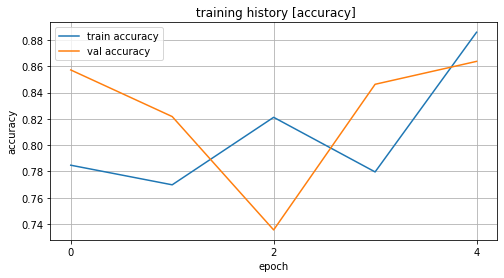

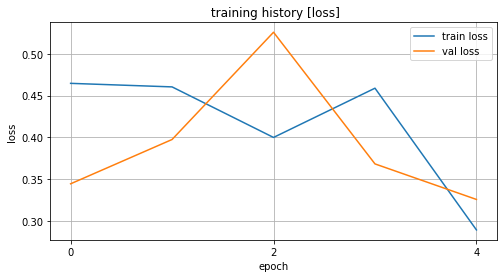

In [13]:
plot_history(history=history1, metrics=["accuracy"],model_name="")
plot_history(history=history1, metrics=["loss"],model_name="")

In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.37%


## Model 2
- LSTM with Dropout

In [15]:
model2 = Sequential()
model2.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model2.add(Dropout(0.2))
model2.add(LSTM(100))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 500, 100)          53200     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 293,701
Trainable params: 293,701
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
history2=model2.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
391/391 [==============================] - 43s 101ms/step - loss: 0.4526 - accuracy: 0.7844
Epoch 2/5
391/391 [==============================] - 20s 50ms/step - loss: 0.3212 - accuracy: 0.8737
Epoch 3/5
391/391 [==============================] - 13s 34ms/step - loss: 0.2734 - accuracy: 0.8917
Epoch 4/5
391/391 [==============================] - 12s 31ms/step - loss: 0.2241 - accuracy: 0.9140
Epoch 5/5
391/391 [==============================] - 11s 29ms/step - loss: 0.2012 - accuracy: 0.9242


In [17]:
# Final evaluation of the model
scores2 = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores2[1]*100))

Accuracy: 87.63%


In [ ]:
plot_history(history=history2, metrics=["accuracy"],model_name="")
plot_history(history=history2, metrics=["loss"],model_name="")

## Model 3
- SimpleRNN 

In [22]:
model3 = Sequential()
model3.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model3.add(SimpleRNN(128, return_sequences=True))
model3.add(SimpleRNN(128))

model3.add(Dense(10))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 128)          20608     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 214,794
Trainable params: 214,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

his3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

In [ ]:
# Final evaluation of the model
scores3 = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores3[1]*100))

In [ ]:
plot_history(history=his3, metrics=["accuracy"],model_name="")
plot_history(history=his3, metrics=["loss"],model_name="")

## Model 4
- Bidirectional LSTM 

In [9]:
model4 = Sequential()
model4.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model4.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
his4 = model4.fit(X_train, y_train, epochs=5, batch_size=64)

 66/391 [====>.........................] - ETA: 24:23 - loss: 0.6723 - accuracy: 0.5810

In [ ]:
# Final evaluation of the model
scores4 = model4.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores4[1]*100))

In [ ]:
plot_history(history=his4, metrics=["accuracy"],model_name="")
plot_history(history=his4, metrics=["loss"],model_name="")